Visualisations for Tom's talk on workflow management.

In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.font_manager import FontProperties

In [2]:
fontP = FontProperties()
fontP.set_family('sans-serif')
fontP.set_size('xx-large')

## Cost of delay with different prioritization rules

### 1. Highest cost of delay

In [3]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [10, 3, 1], 'duration': [3, 3, 3]})

In [4]:
df

,cost_of_delay,duration,project
0,10,3,1
1,3,3,2
2,1,3,3


In [5]:
color_dict = {'Task 1': '#1b9e77', 'Task 2': '#d95f02', 'Task 3':'#7570b3'}

In [6]:
def plot_cost(ax, task_order, column='cost_of_delay', max_x=10, max_y=15):

    completed = []
    duration = 0
    total_cost = 0
    
    for k, i in enumerate(task_order):
        bottom_val = 0
        pp = df[df.project == i]
        width = pp.duration.values[0]
    
        completed.append(i)
        still_togo = list(set(task_order) - set(completed))

        for p_val in still_togo:
            p = df[df.project == p_val]
            ax.bar(duration, p[column], width=width, bottom=bottom_val, color='black', alpha=0.8, linewidth=0)
            bottom_val += p[column].values[0]
            total_cost += (p[column].values[0] * width)
        
        ax.bar(duration, pp[column], bottom=bottom_val, width=width, alpha=0.8, label='Task ' + str(i),
               color=color_dict['Task ' + str(i)], linewidth=0)
        duration += width

    ax.set_ylim(0, max_y)
    ax.set_xlim(0, max_x)
        
    ax.set_ylabel('Cost of Delay', size=16)
    ax.set_xlabel('Duration', size=16)
    
    
#     ax.legend(fontsize='xx-large', prop=fontP)   
    ax.text(0.2, 0.5, 'cost: ' + str(total_cost), color='w', size=50, weight='normal', fontname='sans-serif')

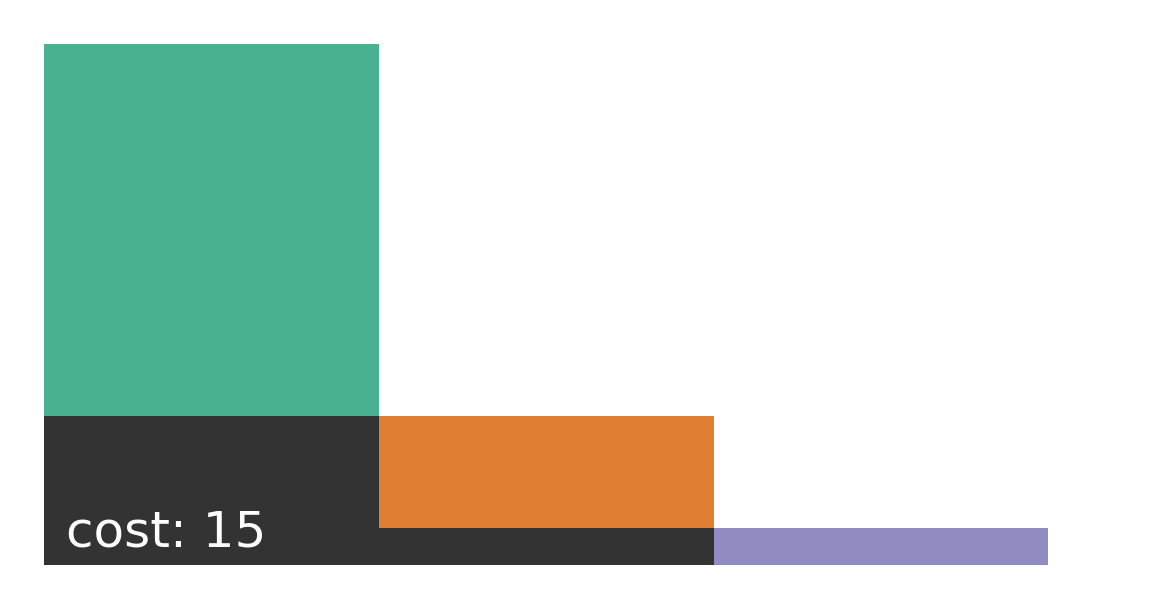

In [7]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order)
pl.axis('Off')
pl.show()

**Change the order: 3, 2, 1.**

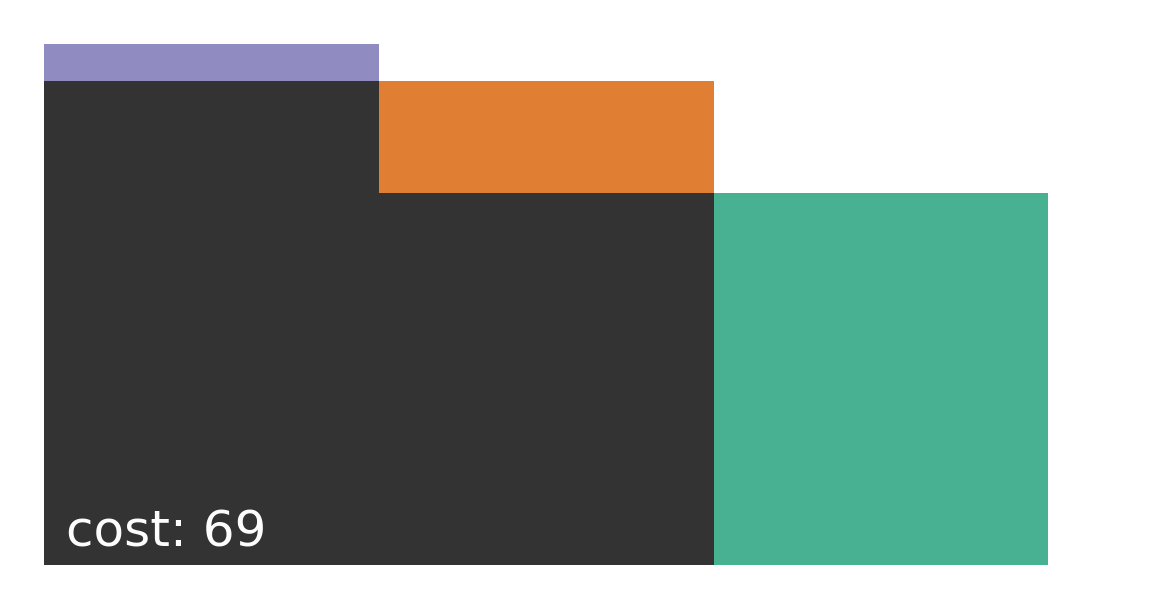

In [8]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order)
pl.axis('Off')
pl.show()

### 2. Shortest first vs longest first

In [9]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [3, 3, 3], 'duration': [1, 3, 10]})

In [10]:
df

,cost_of_delay,duration,project
0,3,1,1
1,3,3,2
2,3,10,3


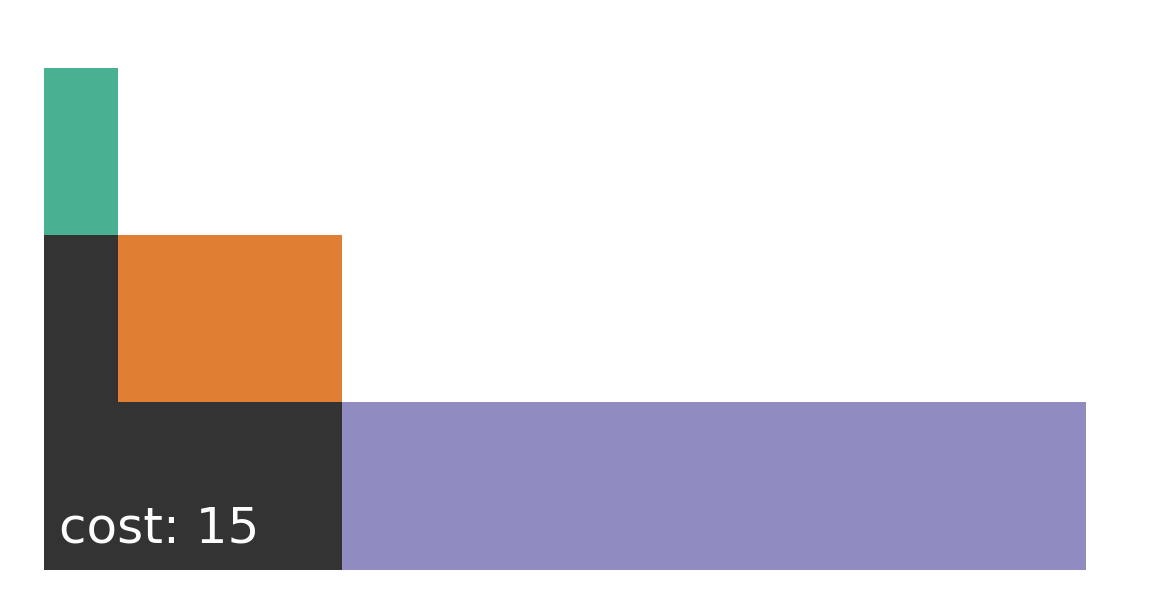

In [11]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, max_y=10, max_x=15)
pl.axis('Off')
pl.show()

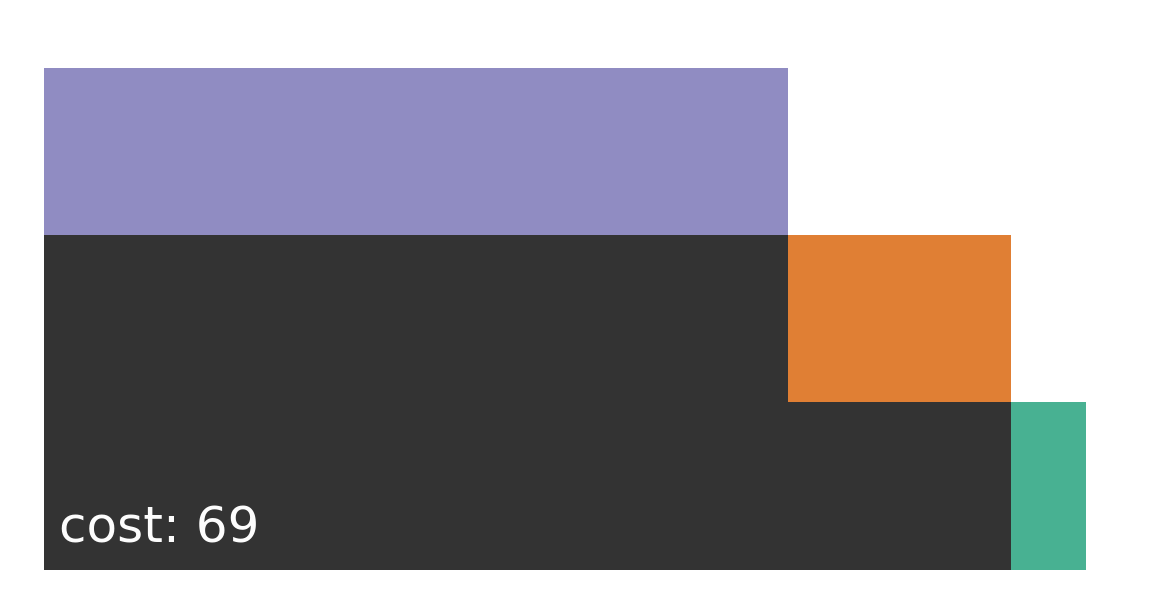

In [12]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, max_y=10, max_x=15)
pl.axis('Off')
pl.show()

### Weighted

In [18]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [10, 7, 1], 'duration': [7, 3, 10]})

In [19]:
df['cod_duration'] = df.cost_of_delay / df.duration

In [20]:
df

,cost_of_delay,duration,project,cod_duration
0,10,7,1,1.428571
1,7,3,2,2.333333
2,1,10,3,0.100000


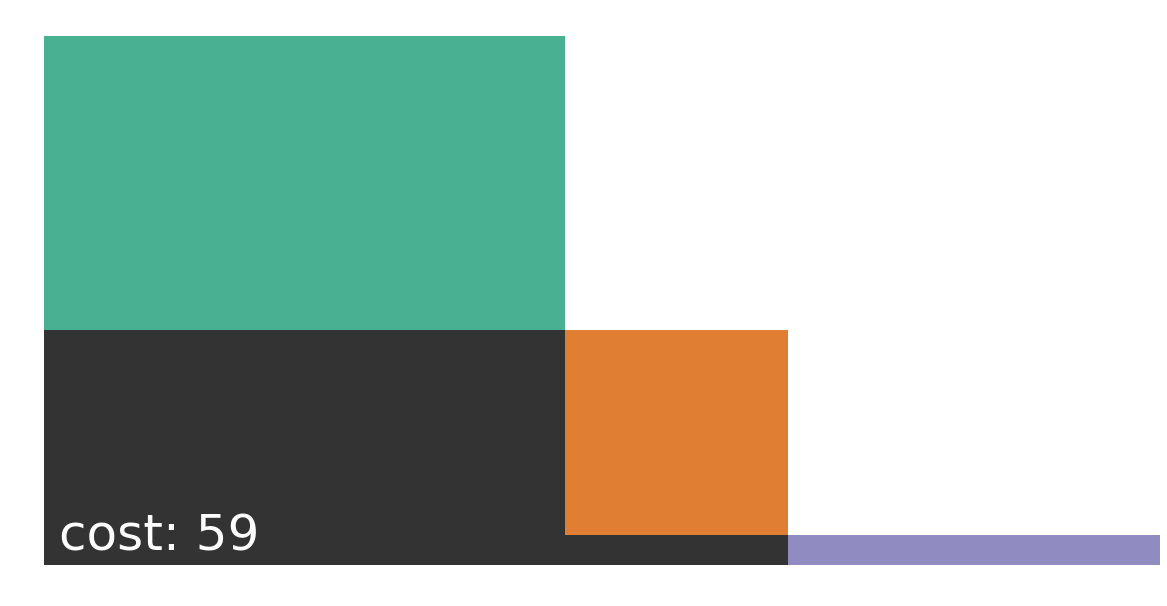

In [26]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, column='cost_of_delay', max_y=19, max_x=15)
pl.axis('Off')
pl.show()

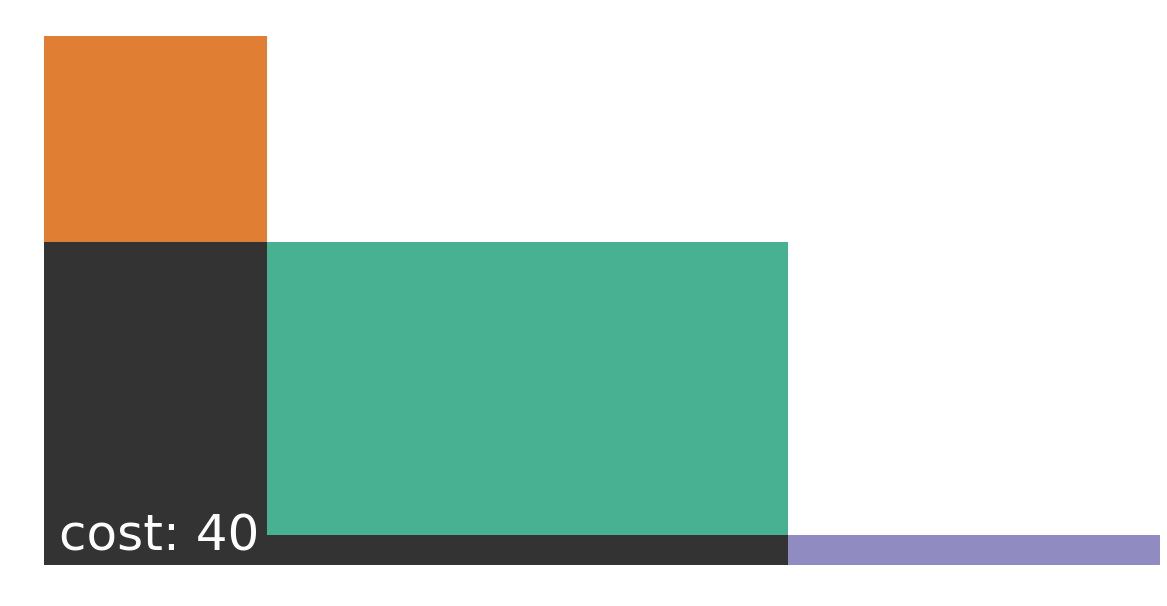

In [27]:
task_order = [2, 1, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, column='cost_of_delay', max_y=19, max_x=15)
pl.axis('Off')
pl.show()

## Optimal Capacity

Point at the bottom of the U curve. 


In [28]:
AVERAGE_C_PER_ITER = 8.
ARRIVAL_RATE_PER_ITER = 8.
CC_PER_ITER = 5000.
COD_PER_ITEM_PER_ITER = 25.

Let's try to parametrise it:

In [29]:
df = pd.DataFrame({'capacity_utilisation': range(10, 101, 5)})
df = pd.DataFrame({'capacity_utilisation': np.linspace(0, 100)})

In [30]:
df.capacity_utilisation = df.capacity_utilisation / 100

In [31]:
df['num_items_in_queue'] = df.capacity_utilisation.apply(lambda x: np.square(x) / (1-x) * AVERAGE_C_PER_ITER)

In [32]:
df.head()

,capacity_utilisation,num_items_in_queue
0,0.000000,0.000000
1,0.020408,0.003401
2,0.040816,0.013895
3,0.061224,0.031943
4,0.081633,0.058050


In [33]:
df['cod'] = df.num_items_in_queue.apply(lambda x: x * COD_PER_ITEM_PER_ITER)
# df.cod = df.cod * 2

In [34]:
df['cc'] = df.capacity_utilisation.apply(lambda x: (1 - x) * CC_PER_ITER)

In [35]:
df['total_cost'] = df.cod + df.cc

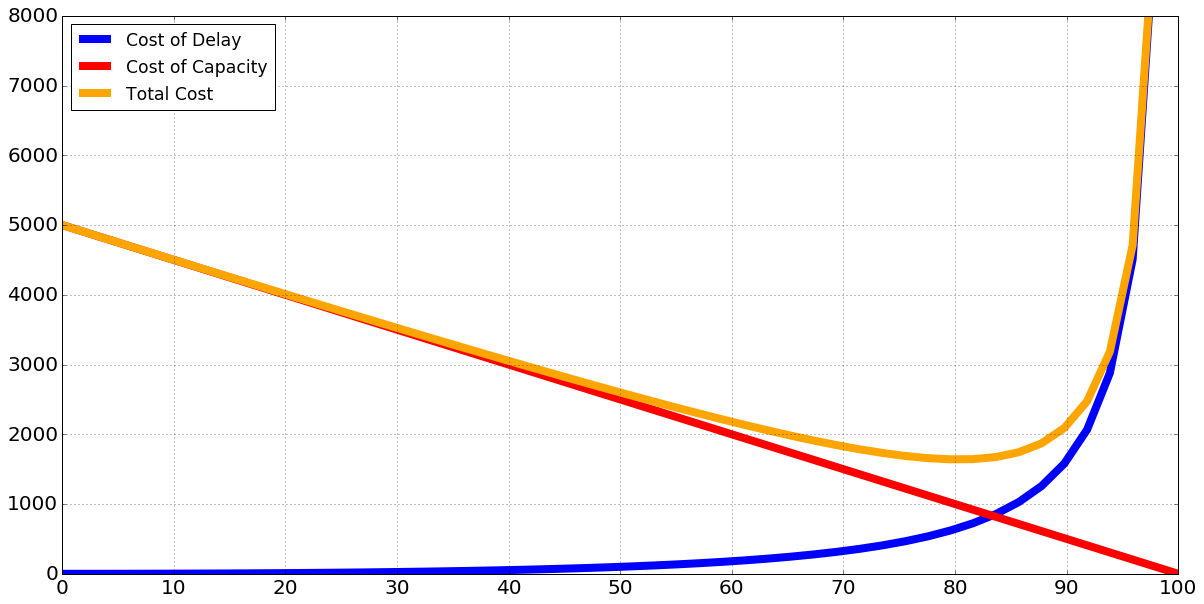

In [36]:
lw = 8
alpha=1
pl.figure(figsize=(20, 10))
pl.plot(df.capacity_utilisation, df.cod, label='Cost of Delay', linewidth=lw, alpha=alpha, color='b')
pl.plot(df.capacity_utilisation, df.cc, label='Cost of Capacity', linewidth=lw, alpha=alpha, color='r')
pl.plot(df.capacity_utilisation, df.total_cost, label='Total Cost', linewidth=lw, alpha=alpha, c='orange')
# pl.axis('Off')

pl.yticks(range(0, 9000, 1000), range(0, 9000, 1000), size=20)
pl.xticks(np.arange(0, 1.1, 0.1 ), np.arange(0, 110, 10), size=20)
pl.ylim(0, 8000)
pl.legend(loc='upper left', fontsize='xx-large')
pl.grid()
pl.show()